# Course 3 end-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis.  
<br/>   

**The purpose** of this project is to conduct exploratory data analysis on a provided data set.
  
**The goal** is to clean data set and create a visualization.

Welcome to the New York City Taxi project!

You are the newest data professional in a fictional data analytics firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Opening your company email, you notice a message from Luana Rodriquez, the senior data analyst at Automatidata. Luana is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC). 
___________________________________


# Task Description

We’re ready to perform EDA on the taxi data from TLC. Has Deshawn told you what the management team expects when it comes to EDA? If not, think of it as a “show your work” kind of report. They will want to see a Python notebook showing the structuring and cleaning you did, as well as any matplotlib/seaborn visualizations you plotted to help us understand the data. I would suggest at the very least a box plot of the ride durations and some time series plots, like a breakdown by quarter or month? Whatever you think makes most sense. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. We’ve found these to be particularly helpful in status reports to the client and board members. For this taxi data, I suggest a Tableau dashboard showing an NYC map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at NYC TLC is a person with visual impairments.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

# Data set description

In [32]:
pd.set_option('max_colwidth', 200) 
pd.set_option('display.width', 500)

In [33]:
df_description = pd.read_excel('description.xlsx')
df_description.fillna('')

,Column name,Description
0,ID,Trip identification number
1,VendorID,"A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc."
2,tpep_pickup_datetime,The date and time when the meter was engaged.
3,tpep_dropoff_datetime,The date and time when the meter was disengaged.
4,Passenger_count,The number of passengers in the vehicle.
5,,This is a driver-entered value.
6,Trip_distance,The elapsed trip distance in miles reported by the taximeter.
7,PULocationID,TLC Taxi Zone in which the taximeter was engaged
8,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
9,RateCodeID,The final rate code in effect at the end of the trip.


In [34]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [35]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [36]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


There are some unexpected statistics:
1. RatecodeID max = 99 although it must range from 1 to 6
2. fare_amount, extra, mta_tax, improvement_surcharge and total_amount min are less than 0. it seems like there should  not be "-" sign

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [38]:
df[~df['RatecodeID'].isin([1,2,3,4,5,6])]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12501,31724098,1,04/18/2017 5:47:58 PM,04/18/2017 5:47:58 PM,0,0.0,99,N,264,264,1,77.2,0.0,0.5,0.0,0.0,0.3,78.0


In [39]:
df[df['fare_amount']<0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
314,105454287,2,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
1646,57337183,2,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
5758,833948,2,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3


It seems like there should not be "-" sign. All costs negatives are fair 

In [40]:
df[df['fare_amount']==0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
4402,108016954,2,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,1,7.06,1,N,263,169,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5722,49670364,2,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10506,26005024,2,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19067,58713019,1,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,1,0.10,5,N,261,13,3,0.0,0.0,0.0,0.0,0.0,0.3,0.3
21842,31708083,1,04/18/2017 4:55:29 PM,04/18/2017 6:29:44 PM,2,20.40,5,N,264,264,3,0.0,0.0,0.0,0.0,12.5,0.3,12.8
22566,19022898,2,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Some strange trips with fare_amount = 0

In [41]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [42]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [43]:
df['Trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


One more check:

In [44]:
df[(df['fare_amount']<0)|(df['extra']<0)|(df['mta_tax']<0)|(df['improvement_surcharge']<0)|(df['tip_amount']<0)|(df['tolls_amount']<0)|(df['total_amount']<0)|(df['trip_distance']<0)|(df['Trip_duration']<datetime.timedelta(0))|(df['Trip_duration']>datetime.timedelta(days=1))]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0 days 00:00:29
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0 days 00:00:37
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,0 days 00:01:20
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,0 days 00:02:13
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0 days 00:00:16
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,0 days 00:02:23
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.70,1,N,161,157,3,28.0,0.5,0.5,0.0,0.0,0.3,29.3,-1 days +23:43:01
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3,0 days 00:02:04
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,0 days 00:02:51
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,0 days 23:15:41


In [45]:
df.iloc[[9356]]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_duration
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,3,28.0,0.5,0.5,0.0,0.0,0.3,29.3,-1 days +23:43:01


Trip_duration < 0

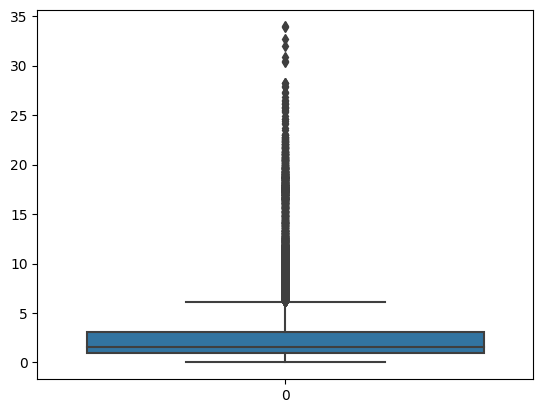

In [46]:
sns.boxplot(df['trip_distance']);

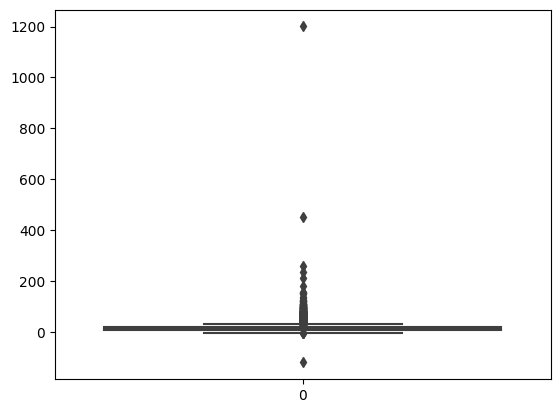

In [47]:
sns.boxplot(df['total_amount']);

In [48]:
df.loc[df['total_amount']>300]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,999.99,0.0,0.0,200.0,0.0,0.3,1200.29,0 days 00:00:58
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.0,5,N,265,265,2,450.00,0.0,0.0,0.0,0.0,0.3,450.30,0 days 00:00:09


It is not obvious if there are errors in these two trips 

In [66]:
df.loc[df['passenger_count']==0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_duration
1516,96563556,1,2017-11-14 15:45:23,2017-11-14 16:26:38,0,8.8,1,N,138,164,1,33.0,0.0,0.5,5.55,5.76,0.3,45.11,0 days 00:41:15
1874,102273749,1,2017-12-03 12:05:52,2017-12-03 12:13:51,0,1.1,1,N,48,237,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,0 days 00:07:59
1925,75654951,1,2017-09-09 03:44:45,2017-09-09 03:49:19,0,0.8,1,N,48,48,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,0 days 00:04:34
3352,107464306,1,2017-12-18 22:44:57,2017-12-18 23:00:24,0,2.7,1,N,87,79,1,12.5,0.5,0.5,2.75,0.00,0.3,16.55,0 days 00:15:27
4060,100326273,1,2017-11-27 13:08:01,2017-11-27 13:17:55,0,1.7,1,N,161,239,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,0 days 00:09:54
4919,106693550,1,2017-12-16 14:59:17,2017-12-16 15:21:59,0,3.1,1,N,163,114,1,15.5,0.0,0.5,4.05,0.00,0.3,20.35,0 days 00:22:42
5563,74279671,1,2017-09-04 17:40:00,2017-09-04 17:51:52,0,1.3,1,N,164,233,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,0 days 00:11:52
5603,107019016,1,2017-12-17 12:18:49,2017-12-17 12:40:45,0,4.2,1,N,230,211,1,18.0,0.0,0.5,3.75,0.00,0.3,22.55,0 days 00:21:56
5668,106785624,1,2017-12-16 19:50:12,2017-12-16 20:00:30,0,1.0,1,N,211,249,1,8.0,0.0,0.5,1.50,0.00,0.3,10.30,0 days 00:10:18
5767,83401081,1,2017-10-04 15:17:52,2017-10-04 15:56:26,0,10.4,1,N,113,138,1,34.0,0.0,0.5,8.10,5.76,0.3,48.66,0 days 00:38:34


In [65]:
df.loc[df['passenger_count']==0]['passenger_count'].count()

32

it's definitely a mistake. Probably we cannot rely on this column at all because it's a hand writed column , but we need to exclude difinitely wrong records.

# Cleaning and transforming                            

1. Drop rows with `fare_amount` equal 0

2. Negative rows with negative `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`.

3. Drop raw with `Trip_duration` < 0

4. Drop row with `RatecodeID` not equal integers from 1 to 6

5. Drop rows with `passenger_count` equal 0

In [49]:
#1
df.drop(df.loc[df['fare_amount']==0].index, inplace=True)

In [50]:
#2
def inversion(row):
    row['fare_amount'] = -row['fare_amount']
    row['extra'] = -row['extra']
    row['mta_tax'] = -row['mta_tax']
    row['tip_amount'] = -row['tip_amount']
    row['tolls_amount'] = -row['tolls_amount']
    row['improvement_surcharge'] = -row['improvement_surcharge']
    row['total_amount'] = -row['total_amount']
    
    return row

df.loc[df['fare_amount']<0] = df.loc[df['fare_amount']<0].apply(inversion, axis=1)

In [51]:
#3
df.drop(df.loc[df['Trip_duration'] < datetime.timedelta(0)].index, inplace=True)

In [52]:
#4
df.drop(df[~df['RatecodeID'].isin([1,2,3,4,5,6])].index, inplace=True)

In [67]:
#5
df.drop(df.loc[df['passenger_count']==0].index, inplace=True)

Creating file for visualisation in Tableau

In [68]:
# df.to_csv('Transformed_2017_Yellow_Taxi_Trip_Data.csv')